In [1]:
import pandas as pd
#import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression


SolarData = pd.read_csv("DATA/SolarData.txt", sep=",")
SolarData = SolarData[SolarData['On/Off'] == 1]
WeatherData = pd.read_csv("DATA/WeatherData_Combined.txt", sep=",", header=0)
WindData = pd.read_csv("DATA/WindData.txt", sep=",")
WindData = WindData[WindData['On/Off'] == 1]


In [2]:
# SOLAR
merged_df = pd.merge(SolarData, WeatherData,on=['Date','location'], how='inner')
df = merged_df
df_corr = df.corr()['kWh produced']

C:\Users\bruno\AppData\Local\Temp\ipykernel_6600\3138152342.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()['kWh produced']


In [3]:
df_corr = df_corr[df_corr > 0.7]
#df_corr.to_csv('correlation')
print(df_corr.index)

Index(['kWh produced', 'TX', 'SQ', 'Q', 'EV24'], dtype='object')


['TX', 'SQ', 'Q', 'EV24']
Correlation coefficients:
TX      0.771570
SQ      0.848760
Q       0.991519
EV24    0.978378
Name: kWh produced, dtype: float64


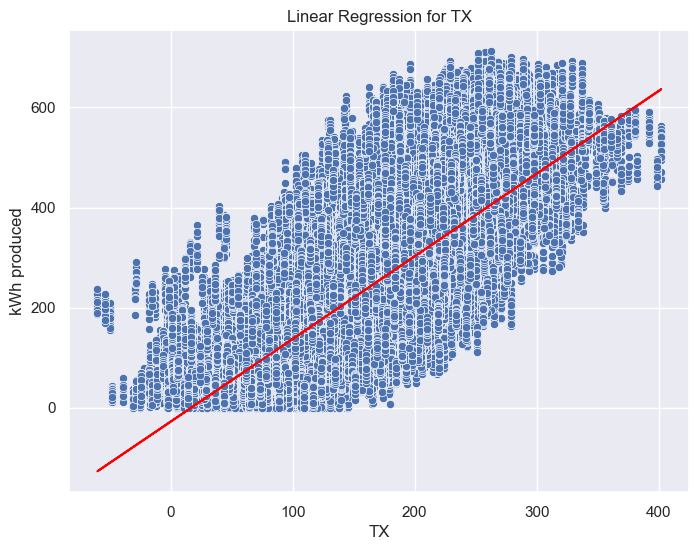

Linear Regression Coefficients for TX: [1.65237369]


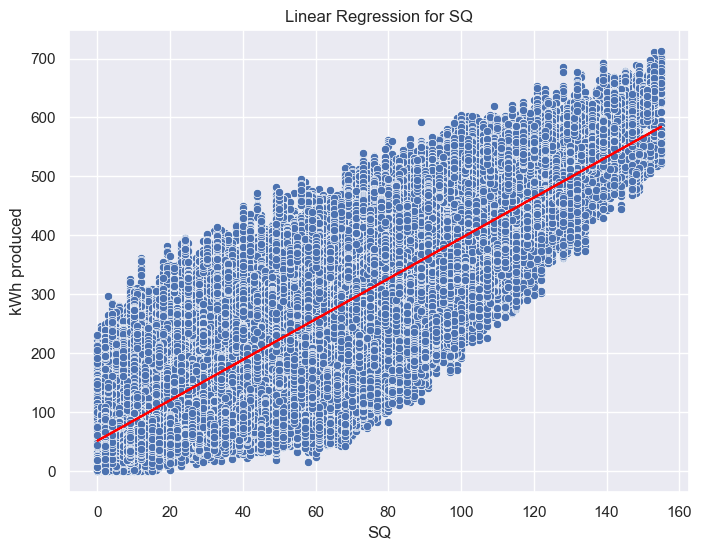

Linear Regression Coefficients for SQ: [3.43566866]


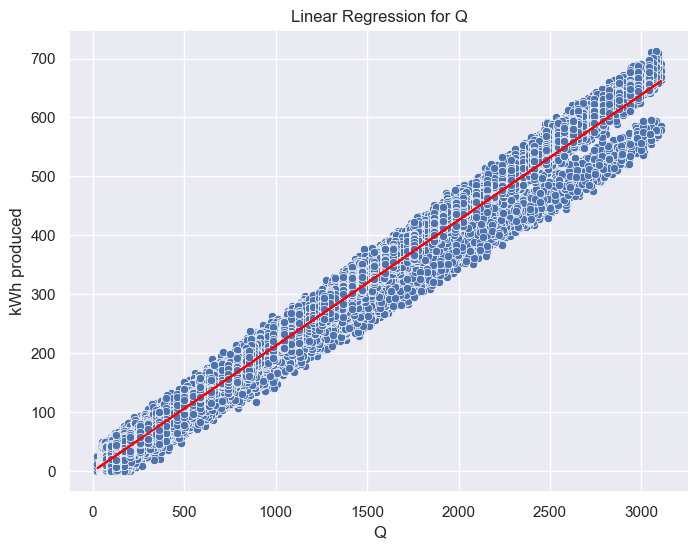

Linear Regression Coefficients for Q: [0.21287503]


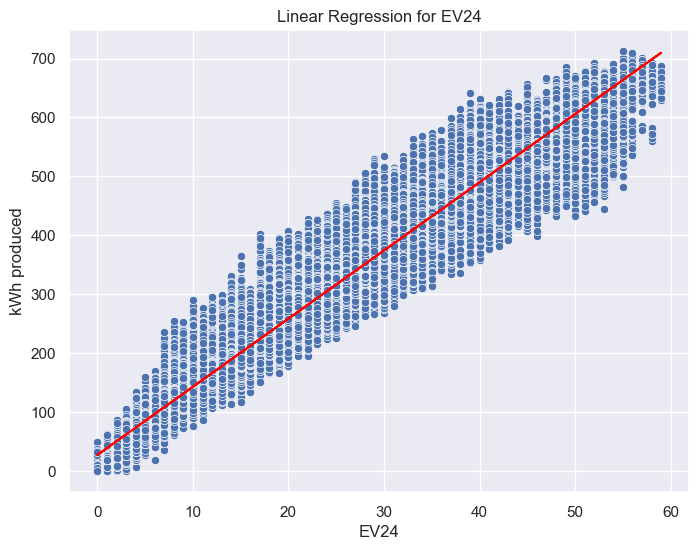

Linear Regression Coefficients for EV24: [11.55972284]


In [4]:
target_column = 'kWh produced'
regression_columns = df_corr.index.tolist()
regression_columns.remove('kWh produced')
print(regression_columns)
# Calculate correlation coefficient
correlation_coefficient = df[regression_columns +[target_column]].corr()[target_column]
correlation_coefficient = correlation_coefficient.drop(
    target_column)  # Drop self-correlation with target column
print('Correlation coefficients:')
print(correlation_coefficient)
df = df.dropna(subset=[target_column] + regression_columns)
for column in regression_columns:
    # Linear Regression
    linear_model = LinearRegression()
    linear_model.fit(df[[column]], df[target_column])

    # Plotting
    sns.set(style="darkgrid")
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=column, y=target_column, data=df)
    plt.plot(df[column], linear_model.predict(df[[column]]), color='red')
    plt.title('Linear Regression for {}'.format(column))
    plt.xlabel(column)
    plt.ylabel(target_column)
    plt.show()

    # Print the coefficients
    print('Linear Regression Coefficients for {}:'.format(
        column), linear_model.coef_)
    


Coefficient: 0.18720712938743156


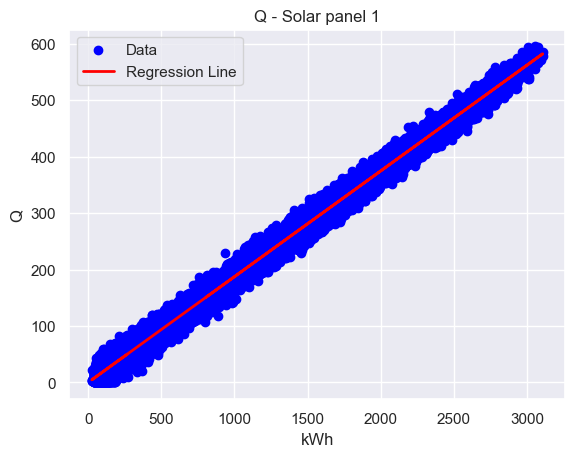

In [5]:
df_1 = df[(df['type'] == 1)]
df_2 = df[(df['type'] == 2)]
df_3 = df[(df['type'] == 3)]

x = df_1['Q'].values.reshape(-1, 1)
y = df_1['kWh produced'].values.reshape(-1, 1)

# Perform linear regression
regression = LinearRegression()
regression.fit(x, y)

# Print the coefficient
coefficient = regression.coef_[0][0]
print('Coefficient:', coefficient)

# Create scatter plot with regression line
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, regression.predict(x), color='red',
         linewidth=2, label='Regression Line')
plt.xlabel('kWh')
plt.ylabel('Q')
plt.title('Q - Solar panel 1')
plt.legend()
plt.show()


Coefficient: 0.22194087191030118


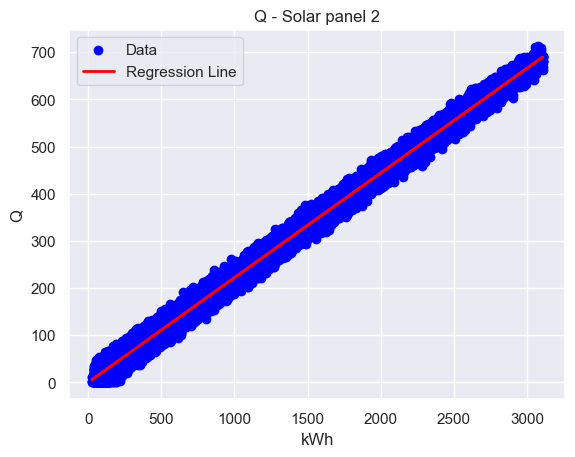

In [6]:
x = df_2['Q'].values.reshape(-1, 1)
y = df_2['kWh produced'].values.reshape(-1, 1)

# Perform linear regression
regression = LinearRegression()
regression.fit(x, y)

# Print the coefficient
coefficient = regression.coef_[0][0]
print('Coefficient:', coefficient)

# Create scatter plot with regression line
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, regression.predict(x), color='red',
         linewidth=2, label='Regression Line')
plt.xlabel('kWh')
plt.ylabel('Q')
plt.title('Q - Solar panel 2')
plt.legend()
plt.show()


Coefficient: 0.21743840938997464


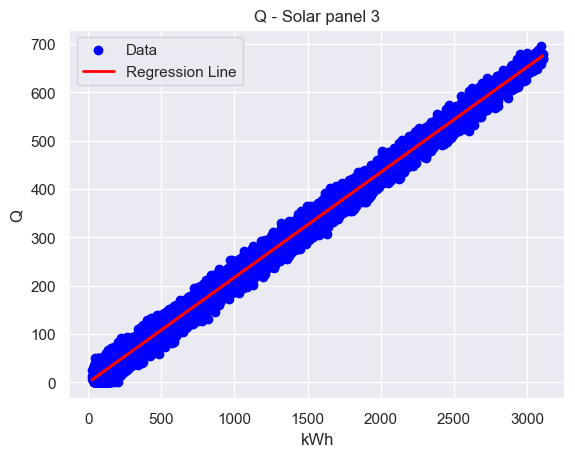

In [7]:
x = df_3['Q'].values.reshape(-1, 1)
y = df_3['kWh produced'].values.reshape(-1, 1)

# Perform linear regression
regression = LinearRegression()
regression.fit(x, y)

# Print the coefficient
coefficient = regression.coef_[0][0]
print('Coefficient:', coefficient)

# Create scatter plot with regression line
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, regression.predict(x), color='red',
         linewidth=2, label='Regression Line')
plt.xlabel('kWh')
plt.ylabel('Q')
plt.title('Q - Solar panel 3')
plt.legend()
plt.show()


In [8]:
#WIND
merged_df = pd.merge(WindData, WeatherData,on=['Date','location'], how='inner')
df = merged_df
df_corr = df.corr()['kWh produced']

C:\Users\bruno\AppData\Local\Temp\ipykernel_6600\2030455169.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()['kWh produced']


In [9]:
df_corr = df_corr[df_corr > 0.7]
#df_corr.to_csv('correlation')
print(df_corr.index)

Index(['kWh produced', 'FHVEC', 'FG', 'FHX', 'FHN', 'FXX'], dtype='object')


['FHVEC', 'FG', 'FHX', 'FHN', 'FXX']
Correlation coefficients:
FHVEC    0.909322
FG       0.955262
FHX      0.843018
FHN      0.783148
FXX      0.766116
Name: kWh produced, dtype: float64


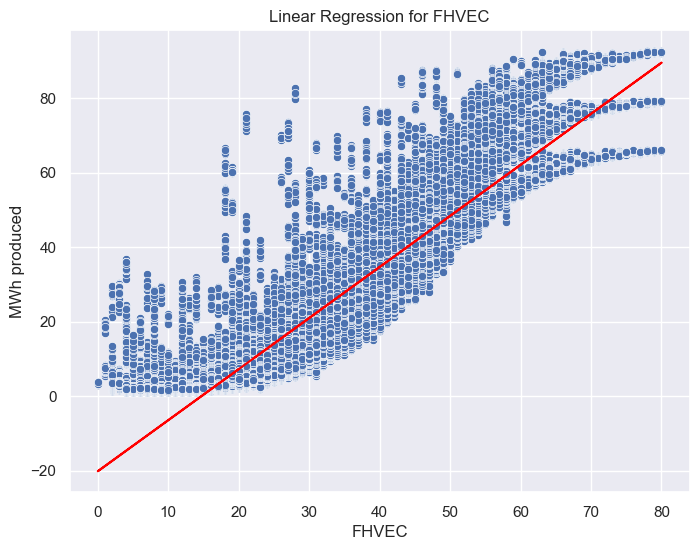

Linear Regression Coefficients for FHVEC: [1.36952758]


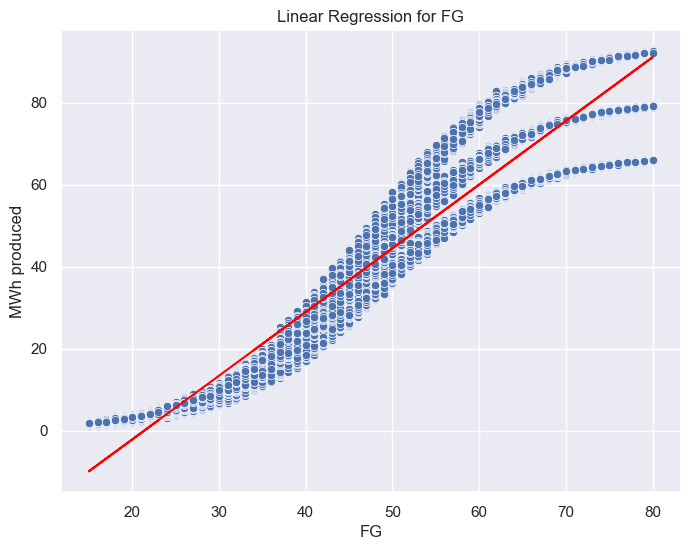

Linear Regression Coefficients for FG: [1.55259121]


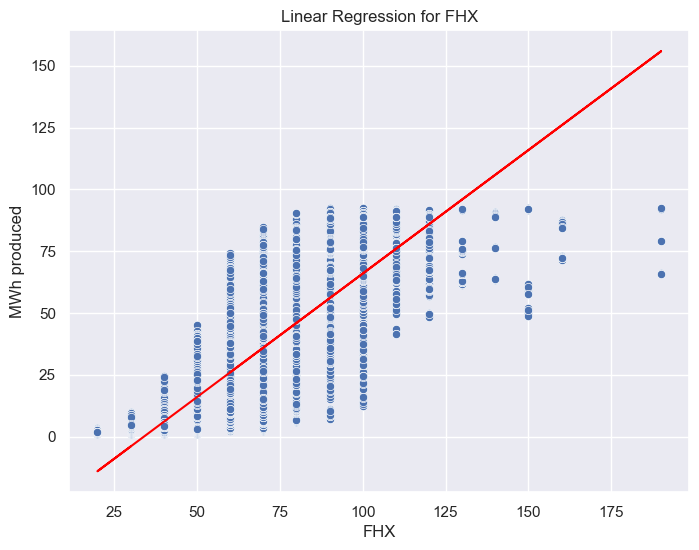

Linear Regression Coefficients for FHX: [0.99948759]


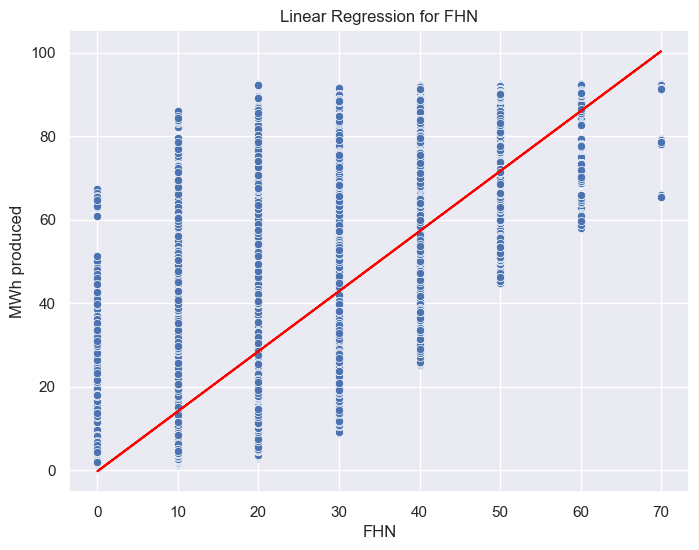

Linear Regression Coefficients for FHN: [1.43815236]


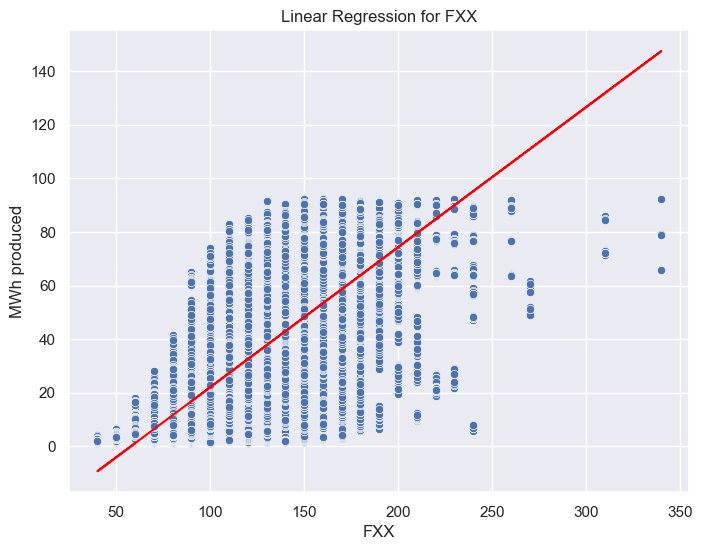

Linear Regression Coefficients for FXX: [0.52228459]


In [10]:
target_column = 'kWh produced' 
regression_columns = df_corr.index.tolist()
regression_columns.remove('kWh produced')
print(regression_columns)
# Calculate correlation coefficient
correlation_coefficient = df[regression_columns +[target_column]].corr()[target_column]
correlation_coefficient = correlation_coefficient.drop(
    target_column)  # Drop self-correlation with target column
print('Correlation coefficients:')
print(correlation_coefficient)
df = df.dropna(subset=[target_column] + regression_columns)
for column in regression_columns:
    # Linear Regression
    linear_model = LinearRegression()
    linear_model.fit(df[[column]], df[target_column])

    # Plotting
    sns.set(style="darkgrid")
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=column, y=target_column, data=df)
    plt.plot(df[column], linear_model.predict(df[[column]]), color='red')
    plt.title('Linear Regression for {}'.format(column))
    plt.xlabel(column)
    plt.ylabel("MWh produced")
    plt.show()

    # Print the coefficients
    print('Linear Regression Coefficients for {}:'.format(
        column), linear_model.coef_)


Coefficient: 1.2776745577915491


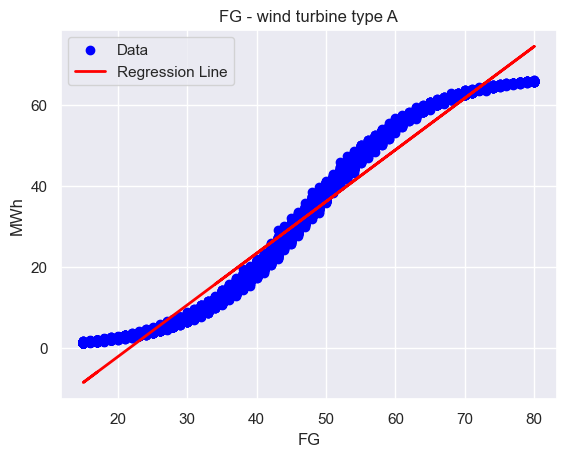

In [11]:
# plot A, B C seperatelly of wind and pick the best one FG
# plot 1, 2 3 seperatelly of Solar and pick the best one Q

# Linear Regression

df_a = df[(df['type'] == 'A')]
df_b = df[(df['type'] == 'B')]
df_c = df[(df['type'] == 'C')]

x = df_a['FG'].values.reshape(-1, 1)
y = df_a['kWh produced'].values.reshape(-1, 1)

# Perform linear regression
regression = LinearRegression()
regression.fit(x, y)

# Print the coefficient
coefficient = regression.coef_[0][0]
print('Coefficient:', coefficient)

# Create scatter plot with regression line
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, regression.predict(x), color='red',
         linewidth=2, label='Regression Line')
plt.xlabel('FG')
plt.ylabel('MWh')
plt.title('FG - wind turbine type A')
plt.legend()
plt.show()


Coefficient: 1.474936550617908


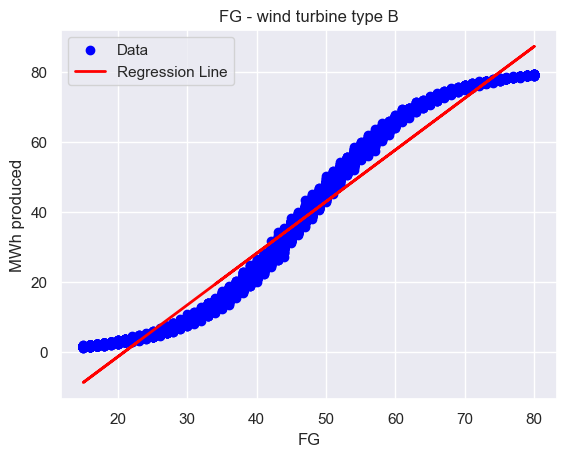

In [15]:
x = df_b['FG'].values.reshape(-1, 1)
y = df_b['kWh produced'].values.reshape(-1, 1)

# Perform linear regression
regression = LinearRegression()
regression.fit(x, y)

# Print the coefficient
coefficient = regression.coef_[0][0]
print('Coefficient:', coefficient)

# Create scatter plot with regression line
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, regression.predict(x), color='red',
         linewidth=2, label='Regression Line')
plt.xlabel('FG')
plt.ylabel('MWh produced')
plt.title('FG - wind turbine type B')
plt.legend()
plt.show()


Coefficient: 1.786951834067202


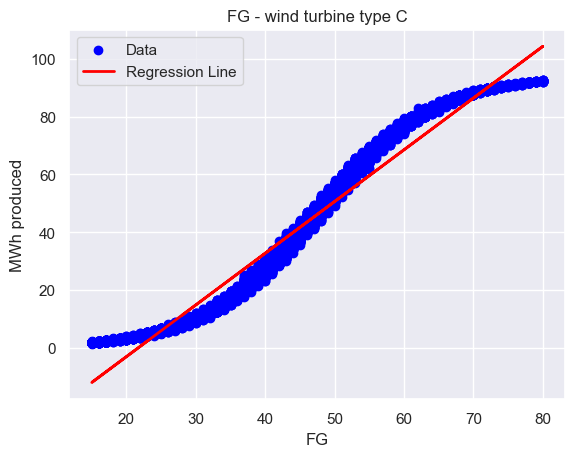

In [13]:

x = df_c['FG'].values.reshape(-1, 1)
y = df_c['kWh produced'].values.reshape(-1, 1)

# Perform linear regression
regression = LinearRegression()
regression.fit(x, y)

# Print the coefficient
coefficient = regression.coef_[0][0]
print('Coefficient:', coefficient)

# Create scatter plot with regression line
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, regression.predict(x), color='red',
         linewidth=2, label='Regression Line')
plt.xlabel('FG')
plt.ylabel('MWh produced')
plt.title('FG - wind turbine type C')
plt.legend()
plt.show()
